In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
from jupyterthemes import jtplot
jtplot.style()

In [4]:
%matplotlib inline


### Getting sample data - the IRIS dataset
sklearn have build-in data examples in _datasets_ module

In [5]:
iris = datasets.load_iris()


In [6]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

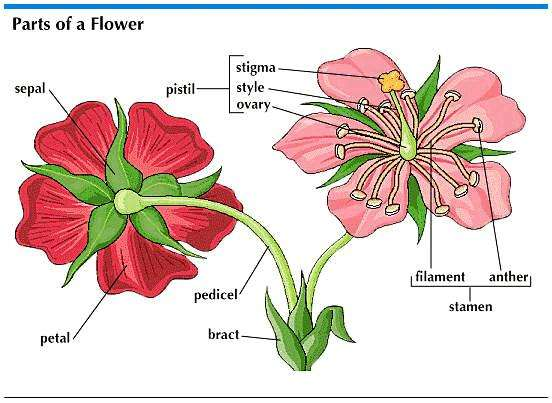

In [8]:
from IPython.display import Image
Image("https://cdn.britannica.com/700x450/06/63306-004-0406576D.jpg")


### Loading IRIS data into Pandas DataFrame

In [9]:
dataset = (
pd.DataFrame(iris.data, columns=iris.feature_names)
    .rename(columns = lambda x: ' '.join(x.split(' ')[:-1]))
    .assign(classname = iris.target)       
    .assign(classname = lambda x: iris.target_names[x.classname])       
    
)       

In [10]:
dataset.index.size

150

In [11]:
dataset.sample(10)

,sepal length,sepal width,petal length,petal width,classname
52,6.9,3.1,4.9,1.5,versicolor
0,5.1,3.5,1.4,0.2,setosa
19,5.1,3.8,1.5,0.3,setosa
99,5.7,2.8,4.1,1.3,versicolor
73,6.1,2.8,4.7,1.2,versicolor
124,6.7,3.3,5.7,2.1,virginica
41,4.5,2.3,1.3,0.3,setosa
137,6.4,3.1,5.5,1.8,virginica
51,6.4,3.2,4.5,1.5,versicolor
118,7.7,2.6,6.9,2.3,virginica


In [12]:
dataset.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'classname'],
      dtype='object')

In [13]:
dataset.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
dataset.groupby('classname').size()

classname
setosa        50
versicolor    50
virginica     50
dtype: int64

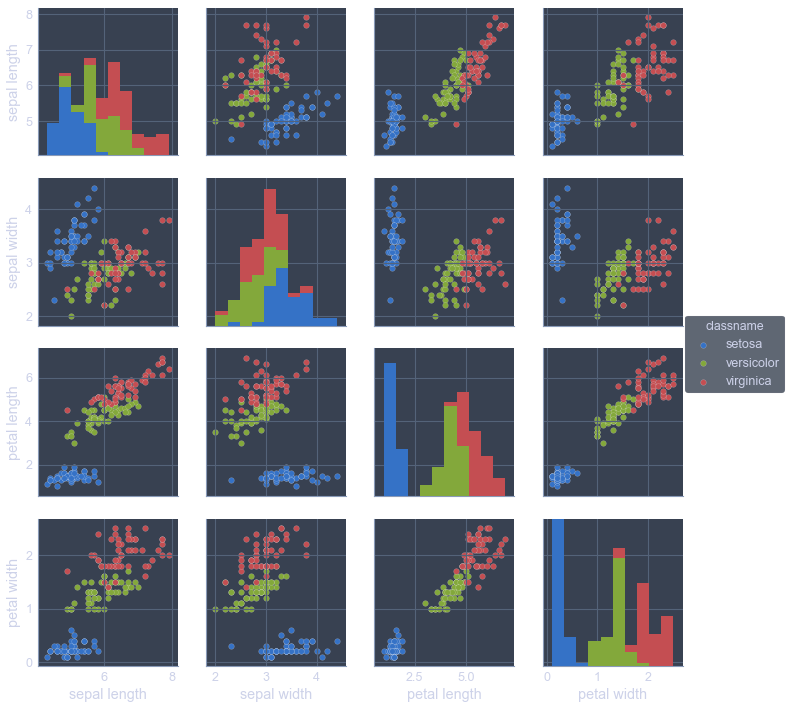

In [15]:
sns.pairplot(dataset, hue='classname')

### Now some machine learning

Preparing X and Y values (data and target classification):

In [16]:
dataset.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'classname'],
      dtype='object')

In [17]:
X = dataset[['sepal length', 'sepal width', 'petal length', 'petal width']]

In [18]:
X.head(2)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [19]:
Y = dataset['classname']

In [20]:
Y.to_frame().head(2)

,classname
0,setosa
1,setosa


Splitting into train and test sets:

In [21]:
seed = 17

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X.values, Y.values, 
    test_size=0.2, 
    random_state=seed)

In [22]:
X_train.shape

(120, 4)

In [23]:
X_train[0:10]

array([[4.7, 3.2, 1.6, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.9, 1.7, 0.4],
       [5.5, 2.4, 3.7, 1. ],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [7.2, 3.2, 6. , 1.8],
       [6.1, 2.8, 4. , 1.3],
       [4.9, 3.1, 1.5, 0.1]])

In [24]:
Y_train[0:10]

array(['setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

### Let's train Decision Tree Classifier model:

In [25]:
model = DecisionTreeClassifier()

In [26]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [27]:
scoring = 'accuracy'

In [28]:
results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)

In [29]:
results

array([1.        , 0.83333333, 0.91666667, 1.        , 1.        ,
       1.        , 1.        , 0.75      , 0.91666667, 0.83333333])

In [30]:
print('Model accuracy score: %0.2f ± %0.2f' % (results.mean(), 2.*results.std()))

Model accuracy score: 0.93 ± 0.17


### Now let's test more models:

In [32]:
models = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

In [33]:
results = {}
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    results[name] = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    print('%s model accuracy score: %0.2f ± %0.2f' % (name, results[name].mean(), 2.*results[name].std()))

LR model accuracy score: 0.95 ± 0.13
LDA model accuracy score: 0.98 ± 0.07
KNN model accuracy score: 0.95 ± 0.11
CART model accuracy score: 0.93 ± 0.17
NB model accuracy score: 0.96 ± 0.11
SVM model accuracy score: 0.97 ± 0.11


In [34]:
pd.DataFrame(results)

,LR,LDA,KNN,CART,NB,SVM
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.833333,0.916667,1.000000,0.833333,0.833333,0.916667
2,1.000000,1.000000,0.916667,0.916667,0.916667,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,0.916667,1.000000,0.916667,1.000000,1.000000,1.000000
6,1.000000,1.000000,0.916667,1.000000,1.000000,1.000000
7,0.833333,0.916667,0.833333,0.750000,0.916667,0.833333
8,1.000000,1.000000,0.916667,0.916667,1.000000,1.000000
9,0.916667,1.000000,1.000000,0.833333,0.916667,1.000000


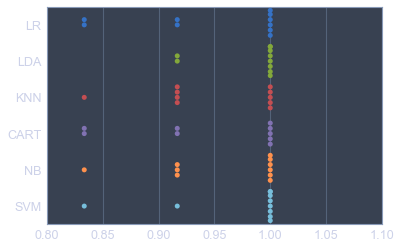

In [35]:
sns.swarmplot(data=pd.DataFrame(results), orient='h' )
ax = plt.gca()
ax.set_xlim(0.8,1.1)
plt.show()

In [36]:
model = LinearDiscriminantAnalysis()

In [37]:
model.fit(X_train, Y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [38]:
prediction = model.predict(X_validation)

In [39]:
prediction

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor'],
      dtype='<U10')

In [40]:
print(accuracy_score(Y_validation, prediction))
print(confusion_matrix(Y_validation, prediction))
print(classification_report(Y_validation, prediction))

0.9666666666666667
[[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         7
 versicolor       0.92      1.00      0.96        11
  virginica       1.00      0.92      0.96        12

avg / total       0.97      0.97      0.97        30



In [41]:
dataset['prediction'] = model.predict(dataset[['sepal length', 'sepal width', 'petal length', 'petal width']])

In [42]:
dataset.sample(10)

,sepal length,sepal width,petal length,petal width,classname,prediction
7,5.0,3.4,1.5,0.2,setosa,setosa
85,6.0,3.4,4.5,1.6,versicolor,versicolor
21,5.1,3.7,1.5,0.4,setosa,setosa
89,5.5,2.5,4.0,1.3,versicolor,versicolor
118,7.7,2.6,6.9,2.3,virginica,virginica
76,6.8,2.8,4.8,1.4,versicolor,versicolor
8,4.4,2.9,1.4,0.2,setosa,setosa
115,6.4,3.2,5.3,2.3,virginica,virginica
75,6.6,3.0,4.4,1.4,versicolor,versicolor
116,6.5,3.0,5.5,1.8,virginica,virginica


In [43]:
dataset[dataset.classname != dataset.prediction]

,sepal length,sepal width,petal length,petal width,classname,prediction
70,5.9,3.2,4.8,1.8,versicolor,virginica
83,6.0,2.7,5.1,1.6,versicolor,virginica
133,6.3,2.8,5.1,1.5,virginica,versicolor
